In [30]:
# Phase 2

# Importing the basic packages

import pandas as pd
import seaborn as sns
import numpy as np

import math

import matplotlib.pyplot as plt

In [31]:
# Importing the data(s)

sales = pd.read_csv("sales.csv")

stores = pd.read_csv("stores.csv")

features = pd.read_csv("features.csv")

In [32]:
# Getting the shapes of the data(s)

print(f" The shape of sales is {sales.shape}, \n the shape of stores is {stores.shape},\n and the shape of features is {features.shape}.")


 The shape of sales is (421570, 5), 
 the shape of stores is (45, 3),
 and the shape of features is (8190, 12).


In [33]:
# A quick look at each of data set

sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [34]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [35]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [36]:
stores["Type"].nunique()

3

In [37]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [38]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [39]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [40]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [41]:
# Having a look at the rows with missing values

features_1 = features[features.isna().any(axis=1)]
features_1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


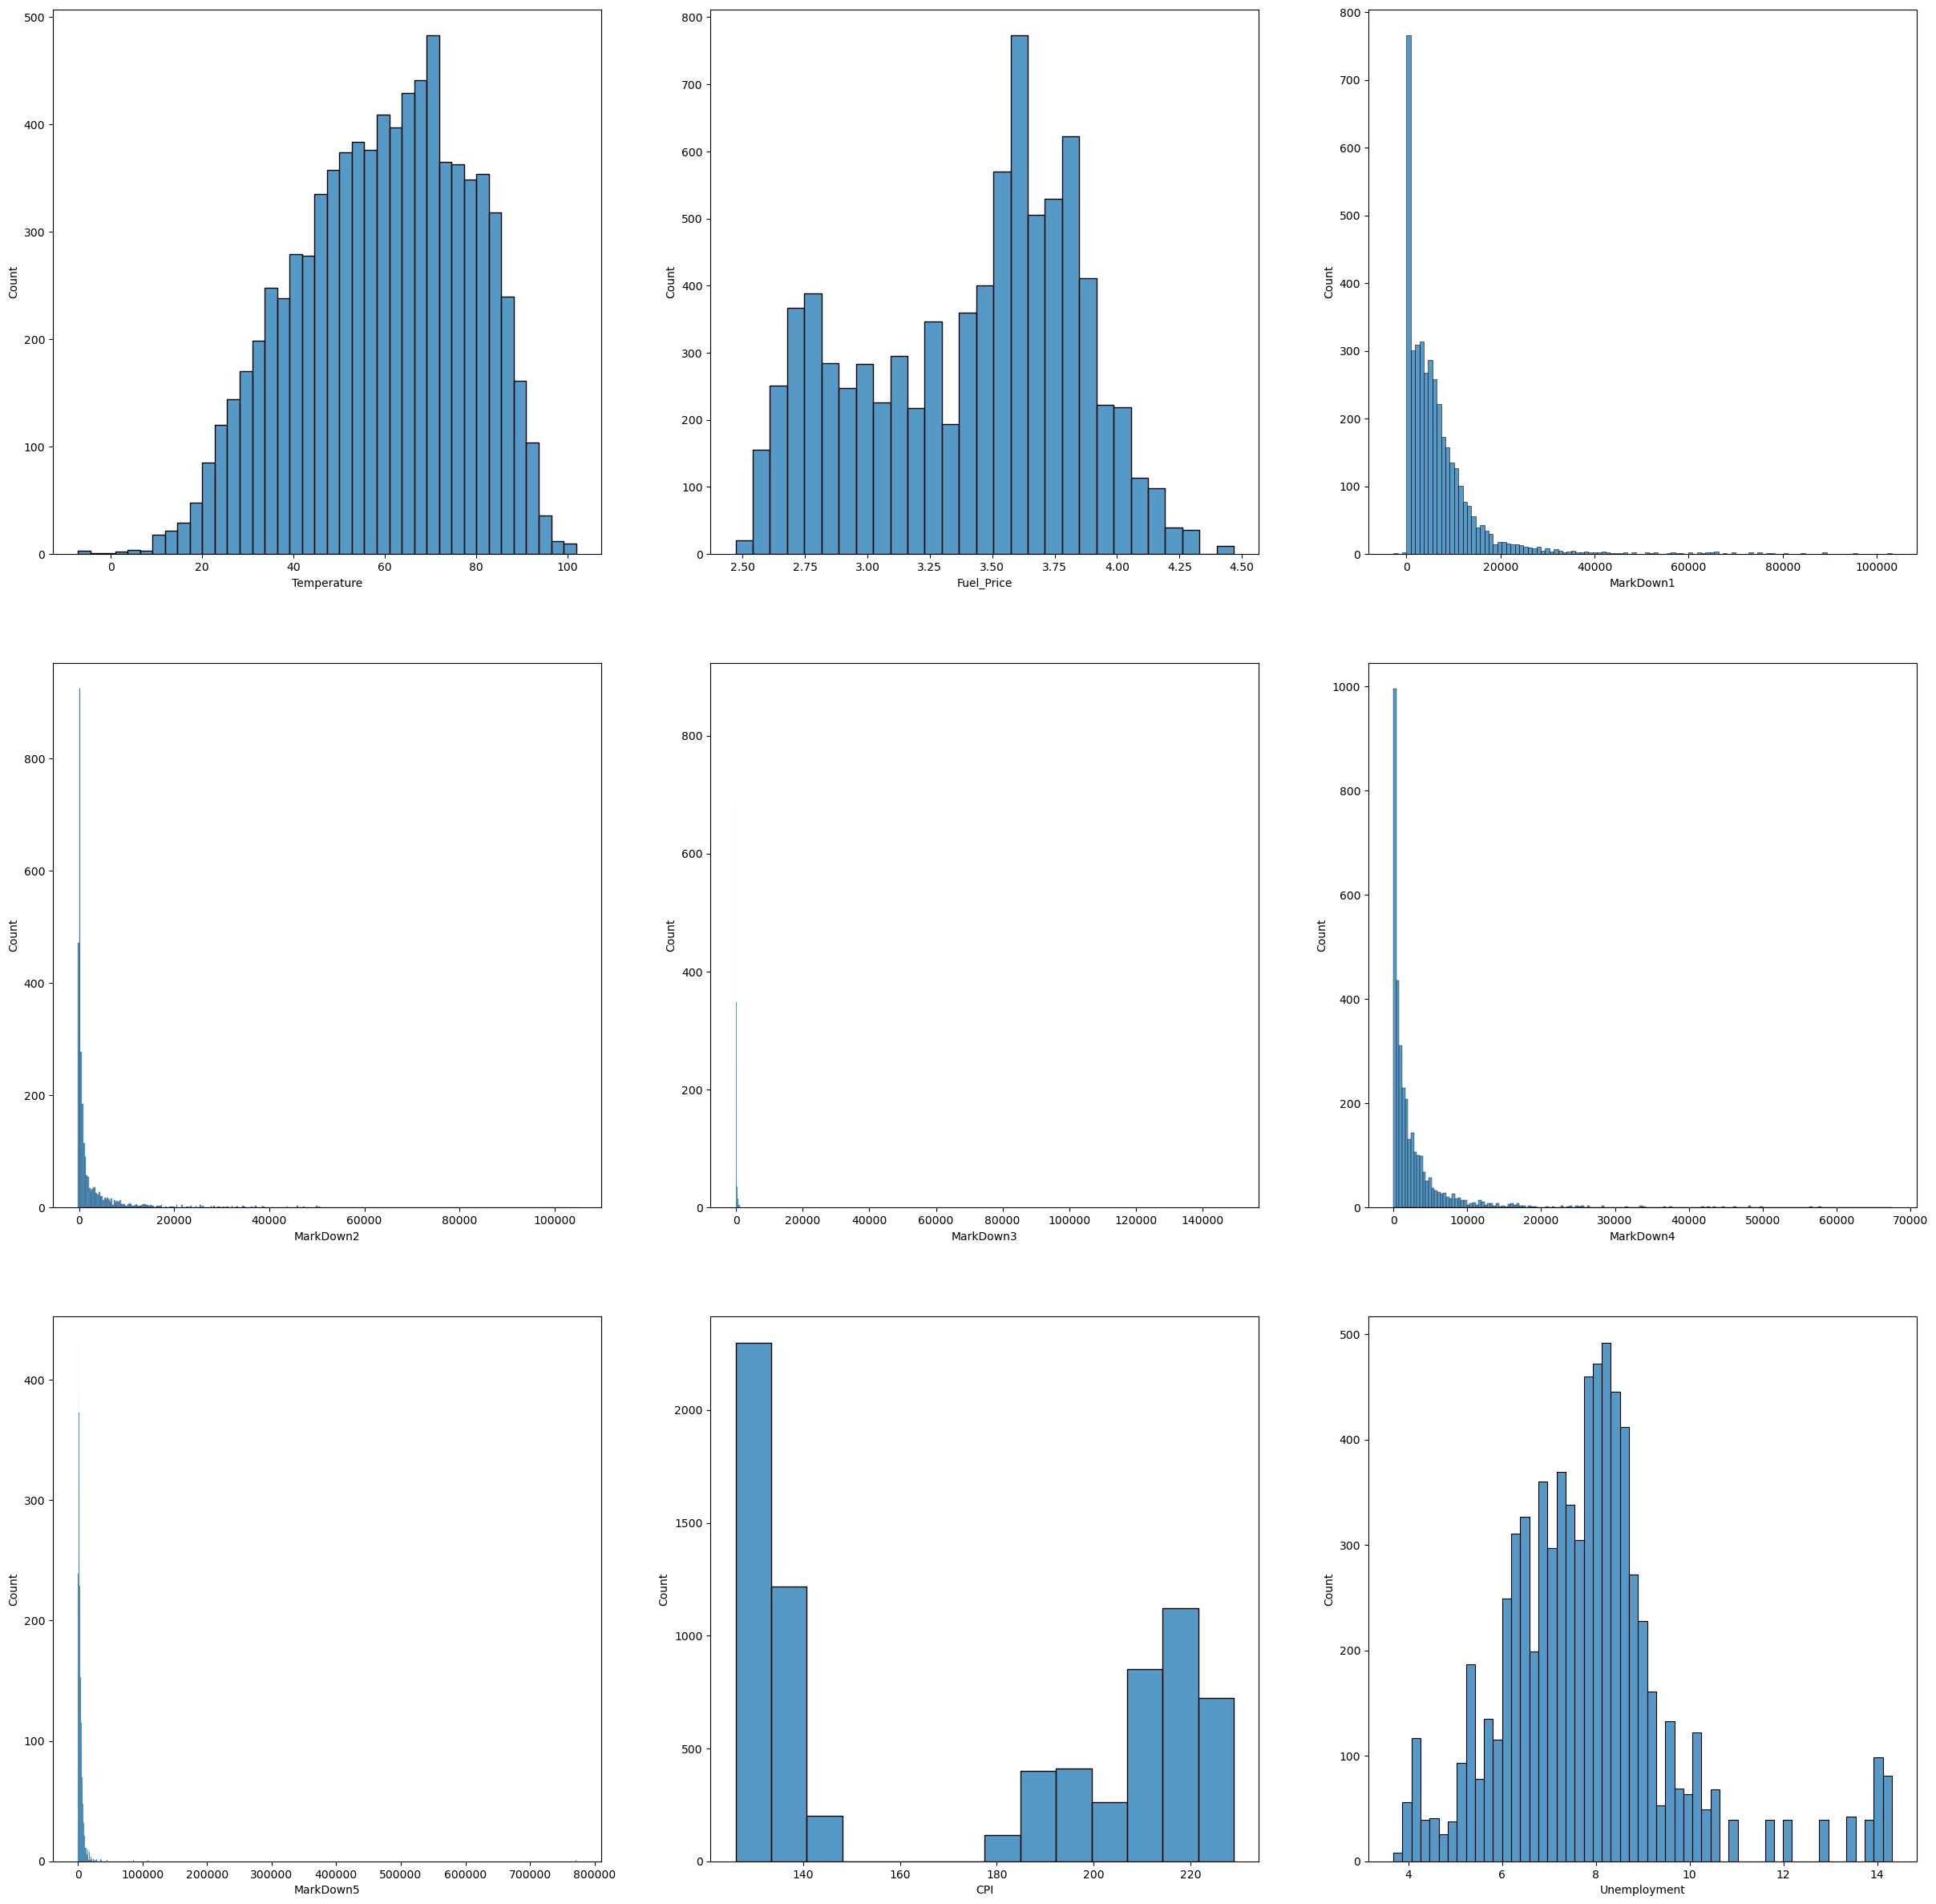

In [42]:
# Plotting some features, using box-plot

features_toPlot = features.drop(columns=["Date","Store","IsHoliday"])

cols = features_toPlot.columns
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(features_toPlot[col], ax=ax)

plt.show()


In [43]:
# As there are considerable number of missing values, we will fill them using median

features_filled = features.fillna(features.median())

C:\Users\GGPC\AppData\Local\Temp\ipykernel_20536\888260954.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  features_filled = features.fillna(features.median())


In [44]:
features_filled.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False


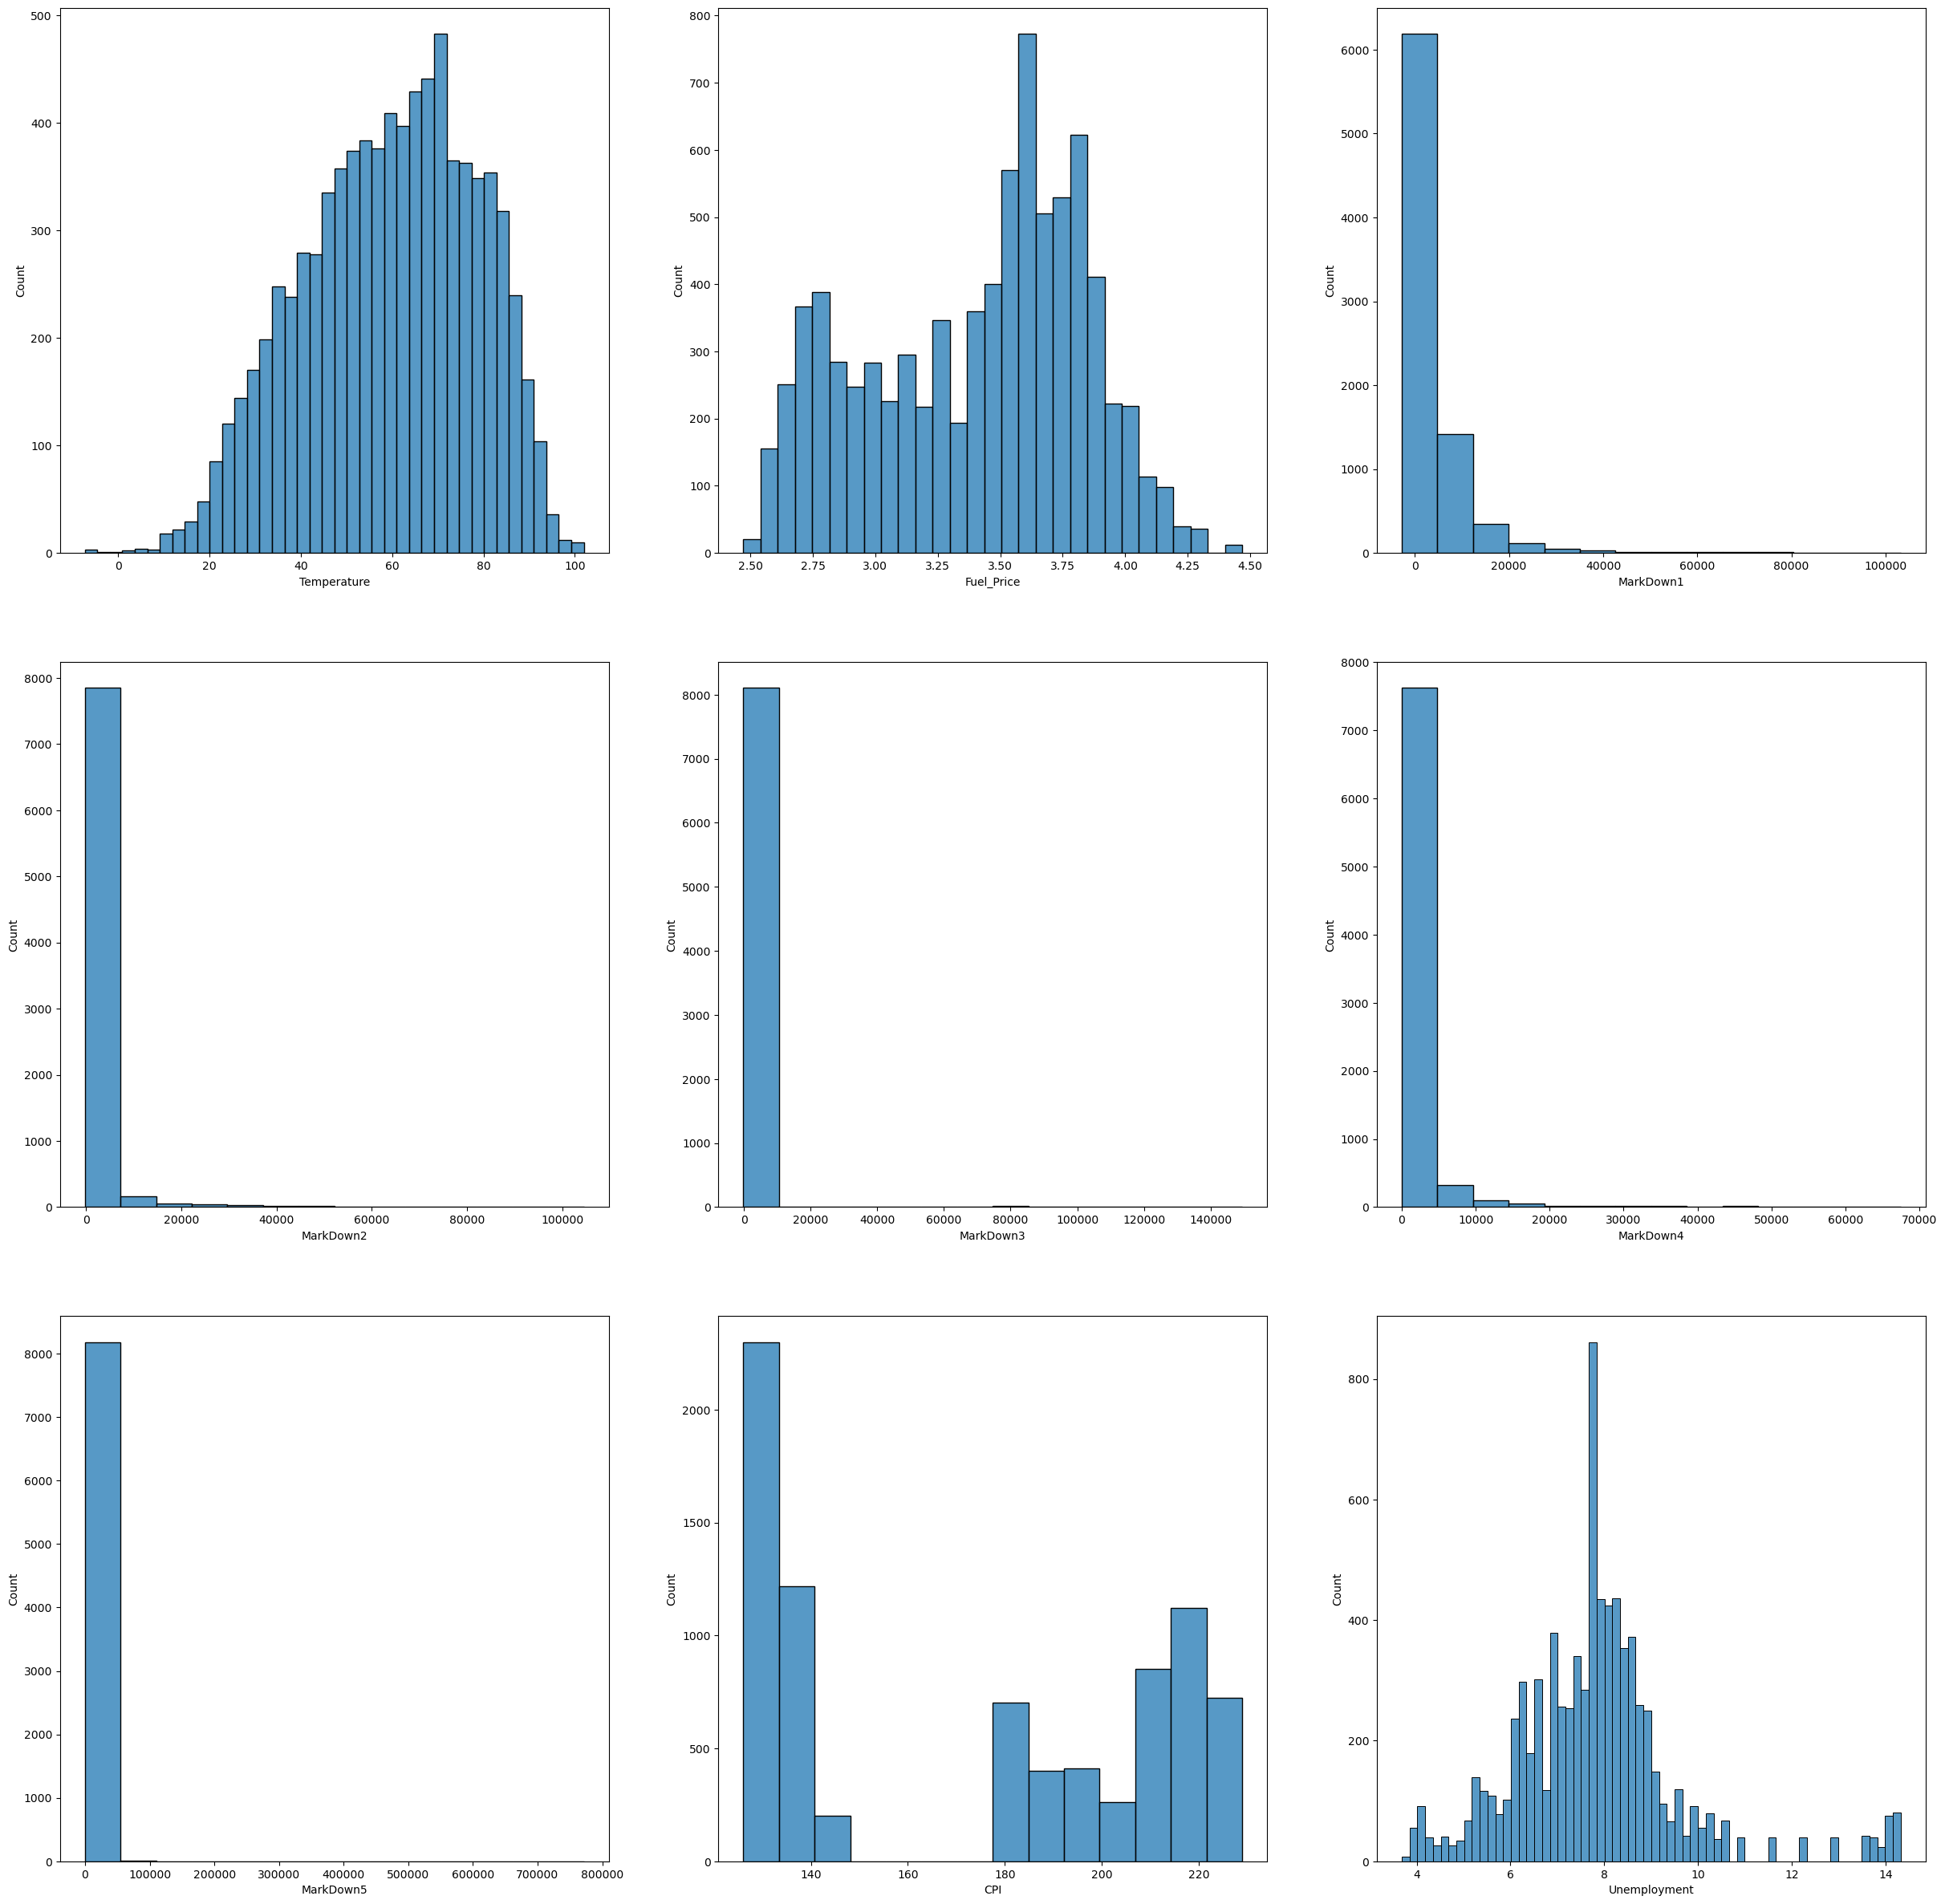

In [45]:
# Again plotting:

# Plotting some features, using box-plot

features_toPlot = features_filled.drop(columns=["Date","Store","IsHoliday"])

cols = features_toPlot.columns
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(features_toPlot[col], ax=ax)

plt.show()

In [46]:
features_filled.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,5870.369802,1441.526149,796.728201,2071.613487,3421.955484,173.196752,7.825334
std,12.987966,18.678607,0.431337,6598.744531,5446.593934,7537.887934,4539.111378,9228.907117,38.384486,1.808971
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,132.653774,6.833000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,212.766994,8.519000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [47]:
# Getting rid of outliers for certain features

outliers_list = ["Temperature", "Fuel_Price", "Unemployment"]

for element in outliers_list:
    q_low = features_filled[element].quantile(0.1)
    q_hi  = features_filled[element].quantile(0.9)
    features_filled_W_outlier = features_filled[(features_filled[element] >= q_low) & (features_filled[element] <= q_hi)]
features_filled.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False


In [48]:
features_filled.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

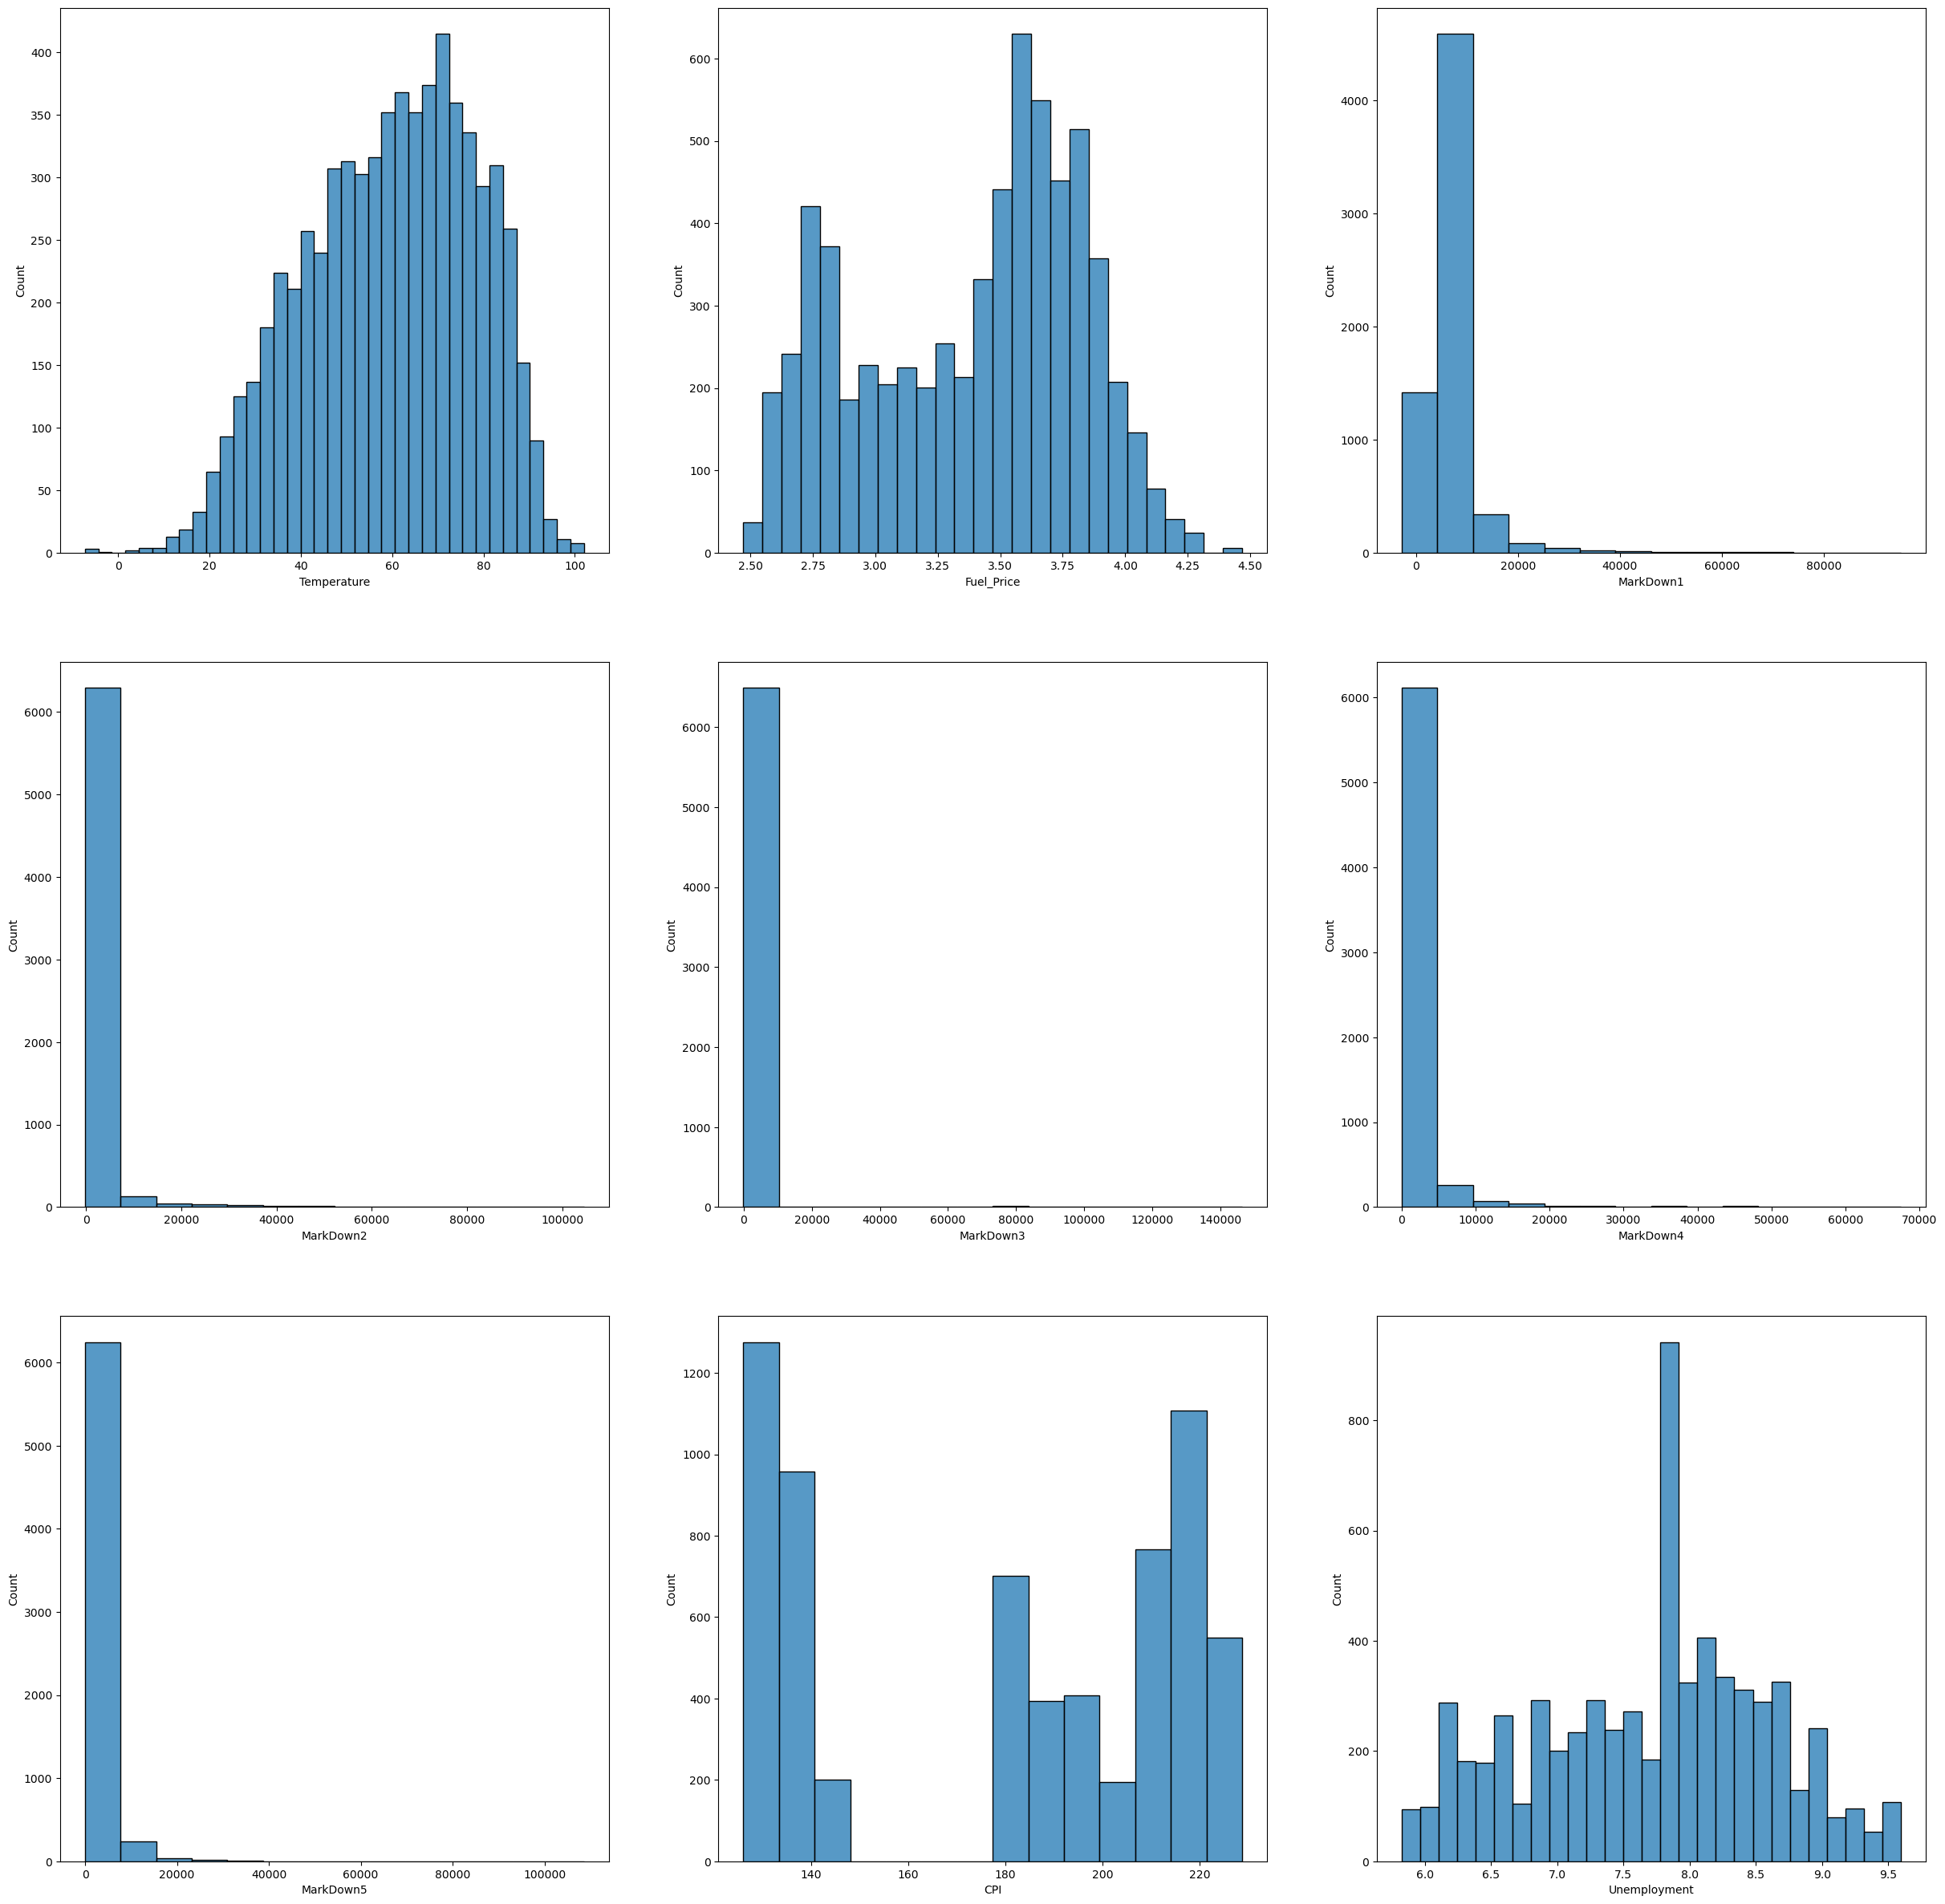

In [49]:
# Again plotting:

# Plotting some features, using box-plot

features_toPlot = features_filled_W_outlier.drop(columns=["Date","Store","IsHoliday"])

cols = features_toPlot.columns
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(features_toPlot[col], ax=ax)

plt.show()

In [50]:
# Applying log transformation

features_filled_W_outlier["Temperature"] = np.log(features_filled_W_outlier["Temperature"])


c:\Users\GGPC\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\GGPC\AppData\Local\Temp\ipykernel_20536\2097756238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_filled_W_outlier["Temperature"] = np.log(features_filled_W_outlier["Temperature"])


In [51]:
features_filled_W_outlier.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,2010-02-12,3.650918,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,2010-02-19,3.687128,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,2010-02-26,3.842244,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,2010-03-05,3.839452,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False


In [52]:
# Encoding the categorical column

from sklearn.preprocessing import LabelEncoder

features_filled_W_outlier["IsHoliday"]  = LabelEncoder().fit_transform(features_filled_W_outlier["IsHoliday"])

features_filled_W_outlier.head()



C:\Users\GGPC\AppData\Local\Temp\ipykernel_20536\4204954214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_filled_W_outlier["IsHoliday"]  = LabelEncoder().fit_transform(features_filled_W_outlier["IsHoliday"])


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0
1,1,2010-02-12,3.650918,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,1
2,1,2010-02-19,3.687128,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,0
3,1,2010-02-26,3.842244,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,0
4,1,2010-03-05,3.839452,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,0


In [53]:
# Encoding the categorical data for "sales" data set

sales["IsHoliday"] = LabelEncoder().fit_transform(sales["IsHoliday"])

In [54]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


In [55]:
sales.shape, features.shape

((421570, 5), (8190, 12))

In [56]:
sales["Dept"].isna().sum()

0

In [57]:
new_sales = sales.drop(columns=["IsHoliday", "Dept"])
new_sales.shape

(421570, 3)

In [58]:
new_features = pd.merge(features, stores, on = "Store", how = "left")

In [59]:
new_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [60]:
features.shape, new_features.shape

((8190, 12), (8190, 14))

In [61]:
ddf = pd.merge(new_features, new_sales, on = ["Date", "Store"], how= "left")
ddf.shape

(423325, 15)

In [62]:
dff = ddf = pd.merge(new_features, new_sales, on = ["Date", "Store"], how= "right")
dff.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,24924.50
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,46039.49
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,41595.55
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,19403.54
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,21827.90


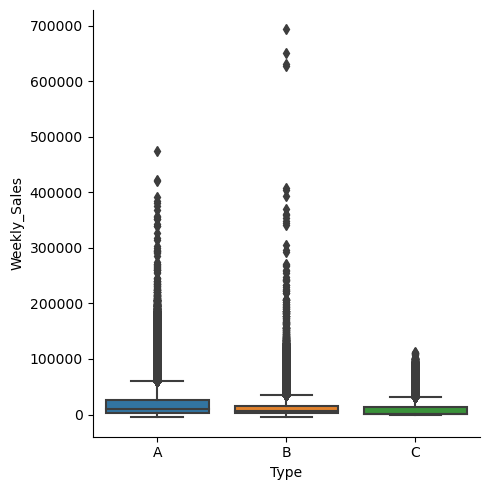

In [63]:
sns.catplot(data = dff, x= "Type", y= "Weekly_Sales", kind="box" )

In [64]:
features_filled_W_outlier.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,4.331391,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,0
8186,45,2013-07-05,4.350278,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,0
8187,45,2013-07-12,4.374120,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,0
8188,45,2013-07-19,4.416911,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,0
8189,45,2013-07-26,4.331523,3.804,212.02,851.73,2.06,10.88,1864.57,182.764003,7.806,0


In [65]:
features_filled_W_outlier.shape

(6557, 12)

In [66]:
temmp_df = pd.merge(features_filled_W_outlier, sales, on = ["Store", "Date", "IsHoliday"], how="left")

In [67]:
temmp_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,1.0,24924.50
1,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,2.0,50605.27
2,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,3.0,13740.12
3,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,4.0,39954.04
4,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,5.0,32229.38


In [68]:
temmp_df.shape

(341667, 14)

In [69]:
sales.shape

(421570, 5)

In [70]:
# Joining the data sets together

sales_1 = sales.drop(columns=["IsHoliday","Store"])

#df = sales_1.set_index("Date").join(features_filled_W_outlier.set_index("Date"))

df = features_filled_W_outlier.join(sales_1.set_index("Date"), on = "Date")

#df.join(df2.set_index('id1'), on='id')


In [71]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,1.0,24924.50
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,2.0,50605.27
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,3.0,13740.12
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,4.0,39954.04
0,1,2010-02-05,3.745023,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,0,5.0,32229.38


In [72]:
df.isna().sum()

Store              0
Date               0
Temperature     2929
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday          0
Dept            1383
Weekly_Sales    1383
dtype: int64

In [73]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [118]:
df_1 = df.join(stores.set_index("Store"), on = "Store")

df_1.tail()

df_1.shape

(15252576, 16)

In [75]:
ddf.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,24924.50
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,46039.49
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,41595.55
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,19403.54
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,21827.90


In [93]:
ddf["IsHoliday"]  = LabelEncoder().fit_transform(ddf["IsHoliday"])

ddf["Type"]  = LabelEncoder().fit_transform(ddf["Type"])


In [94]:
ddf.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Weekly_Sales    0
dtype: int64

In [95]:
to_Fill_Mean = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4", "MarkDown5"]

for element in to_Fill_Mean:
    mean_value = ddf[element].mean()
    ddf[element].fillna(value=mean_value, inplace=True)

In [96]:
X = ddf.drop(columns=["Store","Date", "Weekly_Sales"])
y = ddf["Weekly_Sales"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.head()



,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
255799,61.10,3.796,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136.213613,7.767,0,0,152513
323372,53.11,3.480,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,128.616064,10.398,0,0,158114
201271,50.43,2.708,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.265543,8.163,0,1,140167
69938,75.32,2.582,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,214.878556,6.315,0,0,155078
183821,58.81,4.029,12613.980000,3334.628621,11.500000,1705.280000,3600.790000,138.106581,8.150,0,0,203819


C:\Users\GGPC\AppData\Local\Temp\ipykernel_20536\82543827.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


r2_score is 0.06243706433831275 and MAE is 14523.897373254129 and MSE is 14523.897373254129


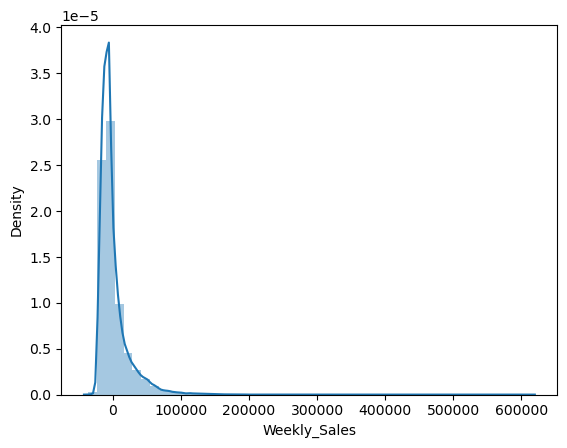

In [104]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

y_pred = linear_model.predict(X_test)

residual = y_test - y_pred

sns.distplot(residual)

print(f"r2_score is {r2_score(y_test,y_pred)} and MAE is {mean_absolute_error(y_test,y_pred)} and MSE is {mean_absolute_error(y_test,y_pred)}")

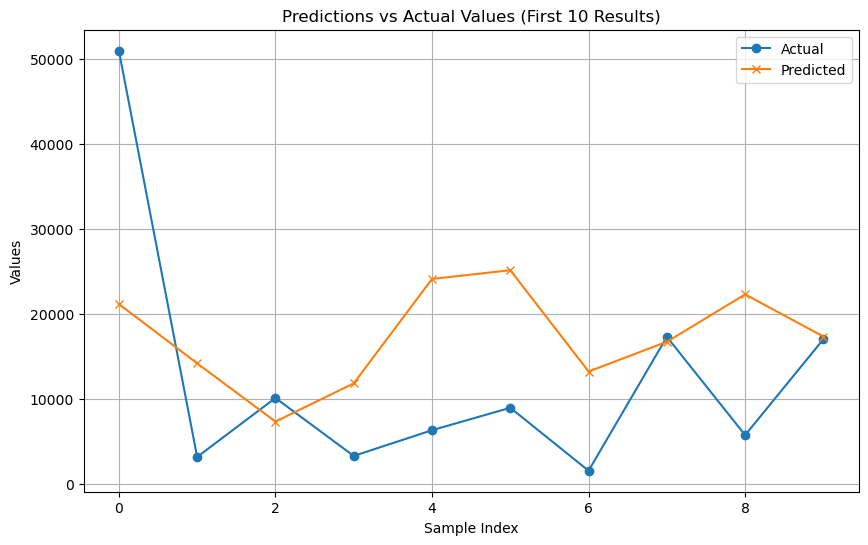

In [115]:
import matplotlib.pyplot as plt

# Assuming you have already made predictions and have the actual y_test values
# Example:
# y_test = [...]  # Your actual test values
# predictions = [...]  # Your model's predictions

# Extract the first ten results
y_test_first_ten = y_test[:10]
predictions_first_ten = y_pred[:10]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(10), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(10), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



In [116]:
from sklearn.preprocessing import PolynomialFeatures


polynomial_3 = PolynomialFeatures(degree=3)

X_poly = polynomial_3.fit_transform(X_train)

X_poly_test = polynomial_3.fit_transform(X_test)

linear_model.fit(X_poly,y_train)

y_pred = linear_model.predict(X_poly_test)


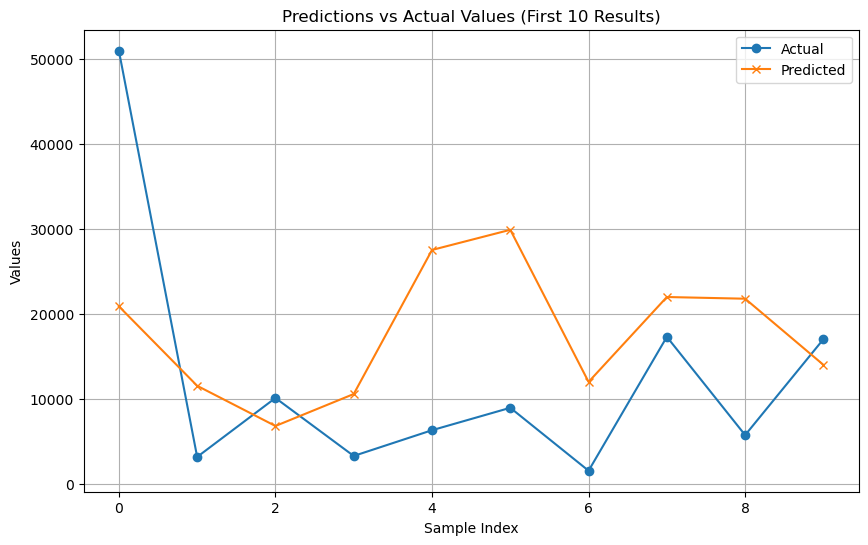

In [117]:
y_test_first_ten = y_test[:10]
predictions_first_ten = y_pred[:10]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(10), y_test_first_ten, marker='o', label='Actual')
plt.plot(range(10), predictions_first_ten, marker='x', label='Predicted')

# Adding titles and labels
plt.title('Predictions vs Actual Values (First 10 Results)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [100]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)

print(score*100)

7.773867175753324


In [101]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

score = r2_score(y_test,y_pred)

print(score*100)

7.062397349855088


In [102]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(X_train,y_train)

y_pred = random_forest.predict(X_test)

score = r2_score(y_test,y_pred)

print(score*100)

7.060051849891236


In [87]:
#from sklearn.svm import SVR


#svr = SVR(kernel='linear') 

#svr.fit(X_train,y_train)

#y_pred = svr.predict(X_test)

#score = r2_score(y_test,y_pred)

#print(score*100)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

neigh.fit(X_train,y_train)

y_pred = neigh.predict(X_test)

score = r2_score(y_test,y_pred)

print(score*100)

-32.99932624270572
